In [173]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set()

In [174]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1

### Problem 1.a

In [175]:
gr_liv_area_data = pd.DataFrame(data['GrLivArea'])  # Response
sale_price_data = pd.DataFrame(data['SalePrice'])   # Predictor

### prepare train set and test set

In [176]:
num_data = data.shape[0]
num_train = int(num_data * 0.8)
num_test = num_data - num_train

# Train Set : 1168 samples
gr_liv_train = pd.DataFrame(gr_liv_area_data[:num_train])
sale_price_train = pd.DataFrame(sale_price_data[:num_train])

# Test Set : 292 samples
gr_liv_test = pd.DataFrame(gr_liv_area_data[-num_test:])
sale_price_test = pd.DataFrame(sale_price_data[-num_test:])

# Check the sample sizes
print("Train Set :", gr_liv_train.shape, sale_price_train.shape)
print("Test Set  :", gr_liv_test.shape, sale_price_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


### train the model by train set

In [177]:
linreg = LinearRegression()
# start training
linreg.fit(gr_liv_train, sale_price_train)
# print coeffcients
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9592.75130193]
Coefficients 	: a =  [[113.84071513]]


### Plot regression line based on coefficients-intercept form

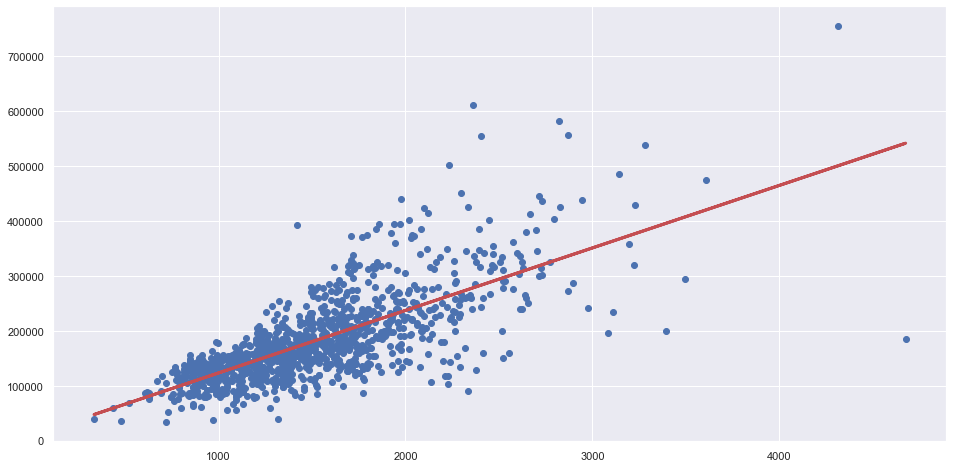

In [178]:
# Formula for the Regression line
regline_x = gr_liv_train
regline_y = linreg.intercept_ + linreg.coef_ * gr_liv_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_liv_train, sale_price_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

### Plot regression line by prediction on train set using the model

### Problem 1.b

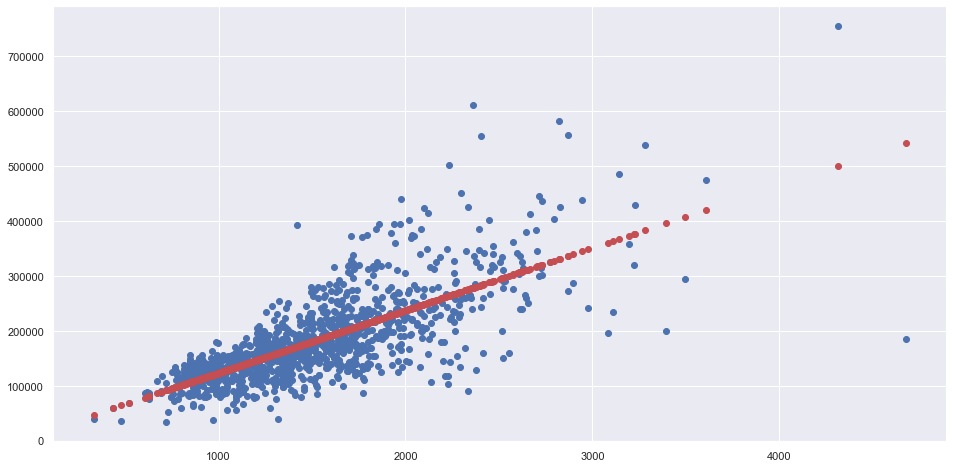

In [179]:
# Predict SalePrice corresponding to GrLivArea
sale_price_train_pred = linreg.predict(gr_liv_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_liv_train, sale_price_train)
plt.scatter(gr_liv_train, sale_price_train_pred, color = "r")
plt.show()

### goodness of model on train set

In [180]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gr_liv_train, sale_price_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sale_price_train, sale_price_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5354427242263546
Mean Squared Error (MSE) 	: 2883319244.120251
Root Mean Squared Error (RMSE) 	: 53696.54778587029


### Plot regression line by prediction on test set using the model

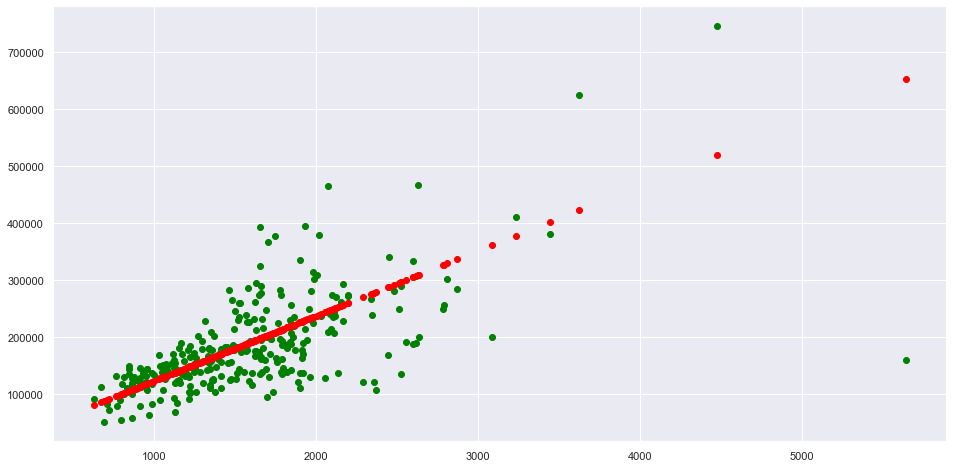

In [181]:
# Predict SalePrice corresponding to GrLivArea
sale_price_test_pred = linreg.predict(gr_liv_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gr_liv_test, sale_price_test, color = "green")
plt.scatter(gr_liv_test, sale_price_test_pred, color = "red")
plt.show()

### goodness of model on test set

In [182]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gr_liv_test, sale_price_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sale_price_test, sale_price_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.3683894557150511
Mean Squared Error (MSE) 	: 4235182093.21243
Root Mean Squared Error (RMSE) 	: 65078.276661359356


## Problem 2

### prepare functions for gauging goodness of model

In [183]:
# for splitting data set to train and test
def split_data(x, y, train_ratio=0.8):
    num_data = y.shape[0]
    num_train = int(num_data * train_ratio)
    num_test = num_data - num_train

    # Train Set
    x_train = pd.DataFrame(x[:num_train])
    y_train = pd.DataFrame(y[:num_train])

    # Test Set
    x_test = pd.DataFrame(x[-num_test:])
    y_test = pd.DataFrame(y[-num_test:])
    
    return [x_train, y_train], [x_test, y_test]

# for training linear regression model
def train_linear_reg(x, y):
    linreg = LinearRegression()
    linreg.fit(x, y)
    
    return linreg

# for computing the R2, MSE and RMSE of predictions on test set
def check_model_goodness(train_set, test_set):
    def mean_sq_err(actual, predicted):
        '''Returns the Mean Squared Error of actual and predicted values'''
        return np.mean(np.square(np.array(actual) - np.array(predicted)))
    
    # first perform model training based on train set
    linreg = train_linear_reg(train_set[0], train_set[1])
    
    # prediction is done on test set
    test_pred = linreg.predict(test_set[0])
    
    # compute R2
    r_2 = linreg.score(test_set[0], test_set[1])
    
    # compute MSE
    mse = mean_sq_err(test_set[1], test_pred)

    # compute RMSE
    rmse = np.sqrt(mse)
    
    return r_2, mse, rmse
    

### evaluate GrLivArea

In [184]:
train_set, test_set = split_data(gr_liv_area_data, sale_price_data)
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <GrLivArea>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <GrLivArea>
Explained Variance (R^2) 	: 0.3683894557150511
Mean Squared Error (MSE) 	: 4235182093.21243
Root Mean Squared Error (RMSE) 	: 65078.276661359356


### evaluate TotalBsmtSF

In [185]:
total_bsmt_data = pd.DataFrame(data['TotalBsmtSF'])

train_set, test_set = split_data(total_bsmt_data, sale_price_data)
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <TotalBsmtSF>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <TotalBsmtSF>
Explained Variance (R^2) 	: 0.24638464383789505
Mean Squared Error (MSE) 	: 5053269440.2703495
Root Mean Squared Error (RMSE) 	: 71086.35199720372


### evaluate GarageArea

In [186]:
garage_area_data = pd.DataFrame(data['GarageArea'])

train_set, test_set = split_data(garage_area_data, sale_price_data)
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <GarageArea>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <GarageArea>
Explained Variance (R^2) 	: 0.3087598274598191
Mean Squared Error (MSE) 	: 4635020785.103456
Root Mean Squared Error (RMSE) 	: 68080.98695747188


### Conclusion

It is well noted that in order to train a good model, we want to keep our variance(R^2) as high as possible, and MSE as low as possible. From the above evaluation result we can see that among GrLivArea, TotalBsmSF, and GarageArea, GrLivArea has the highest variance and lowest MSE, hence we can conclude that the model trained with GrLivArea is the best model.

## Problem 3

### Problem 3.a

In [187]:
# this function help to get the index of outliner row
def get_outliners_index(old_df, df_name):
    index_list = []
    q_1 = old_df.describe()[df_name]['25%']
    q_3 = old_df.describe()[df_name]['75%']
    iqr = q_3 - q_1
    end = q_3 + iqr * 1.5
    start = q_1 - iqr * 1.5

    for index, d in enumerate(old_df[df_name]):
        if d < start or d > end:
            index_list.append(index)
    return index_list

# get a list of unique index for outliners 
outliners_list = set().union(
    get_outliners_index(gr_liv_area_data, 'GrLivArea'), 
    get_outliners_index(sale_price_data, 'SalePrice')
)


# create a new dataframe without outliners for both 'GrLivArea' and 'SalePrice'
new_df = data.drop(outliners_list)

# new GrLivArea and SalePrice dataframe without outliners
new_gr_liv_area_data = pd.DataFrame(new_df['GrLivArea'])
new_sale_price_data = pd.DataFrame(new_df['SalePrice'])

### Problem 3.b

In [188]:
# split data set
train_set, test_set = split_data(new_gr_liv_area_data, new_sale_price_data)

new_linreg = train_linear_reg(train_set[0], train_set[1])

print("Printing coefficients for outlier-free model")
print('Intercept \t: b = ', new_linreg.intercept_)
print('Coefficients \t: a = ', new_linreg.coef_)

Printing coefficients for outlier-free model
Intercept 	: b =  [29068.68516003]
Coefficients 	: a =  [[96.93205951]]


### Plot regression line by prediction on train set using the model

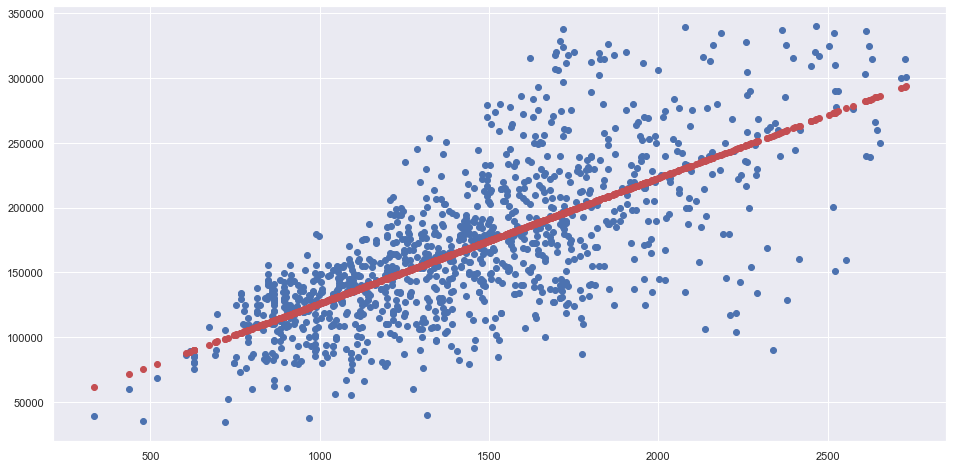

In [189]:
train_set_pred = new_linreg.predict(train_set[0])

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(train_set[0], train_set[1])
plt.scatter(train_set[0], train_set_pred, color = "r")
plt.show()

### Plot regression line by prediction on test set using the model

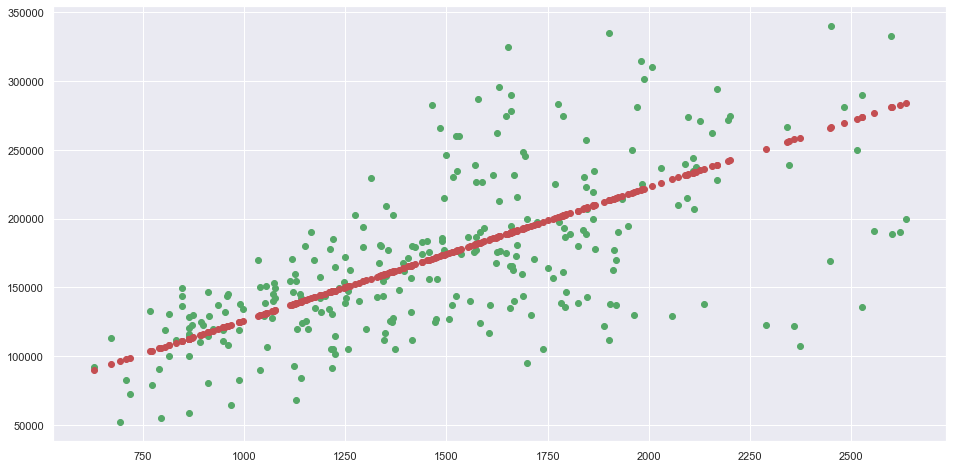

In [190]:
test_set_pred = new_linreg.predict(test_set[0])

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(test_set[0], test_set[1], color = "g")
plt.scatter(test_set[0], test_set_pred, color = "r")
plt.show()

### Problem 3.c

In [191]:
# split data set
train_set, test_set = split_data(new_gr_liv_area_data, new_sale_price_data)

### goodness of the model on train set

In [192]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(train_set[0], train_set[1]))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

new_sale_price_train_pred = new_linreg.predict(train_set[0])
mse = mean_sq_err(train_set[1], new_sale_price_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4807823919255729
Mean Squared Error (MSE) 	: 1724553253.5868115
Root Mean Squared Error (RMSE) 	: 41527.74077152297


### goodness of the model on test set

In [193]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(test_set[0], test_set[1]))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

new_sale_price_test_pred = new_linreg.predict(test_set[0])
mse = mean_sq_err(test_set[1], new_sale_price_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.29384145536891637
Mean Squared Error (MSE) 	: 2112797622.2429085
Root Mean Squared Error (RMSE) 	: 45965.17836626883


### conclusion

Lets look at variance first, for train set, it goes from 0.535 to 0.503. for test set, it goes from 0.368 to 0.365. That is because the data set is not so spreaded as before since outliners have been removed. 
If we look at root mean squared error, for train set, it goes from 53696 to 41527, and for test set , it goes from 65078 to 45965. This tells us that removing outliners help us to train the linear regression model to be more accurate on predicting SalePrice based on GrLivArea. because RMSE is a gauge of error on a model prediction, and the reduction of rmse implies that errors are lesser after removing outliners.